### Lab | Customer Analysis Round 6
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

#### Get the data
We are using the marketing_customer_analysis.csv file.

#### Dealing with the data
Already done in the round 2.

#### Explore the data
Done in the round 3.

#### Processing Data
(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames
#### Linear Regression
- Train-test split.
- Apply linear regression.
#### Model Validation
Description:
- R2.
- MSE.
- RMSE.
- MAE.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Target: Total claim amount.

In the previous lab, we decided to use Customer lifetime value as the target. But now I see that it was specified to use **Total claim amount**, so I'm gonna start with this.

In [ ]:
data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

In [ ]:
data.columns = [col.lower().replace(' ', '_') for col in data.columns]

In [ ]:
num_columns = data.select_dtypes(include=[np.number])
cat_columns = data.select_dtypes(include='object')

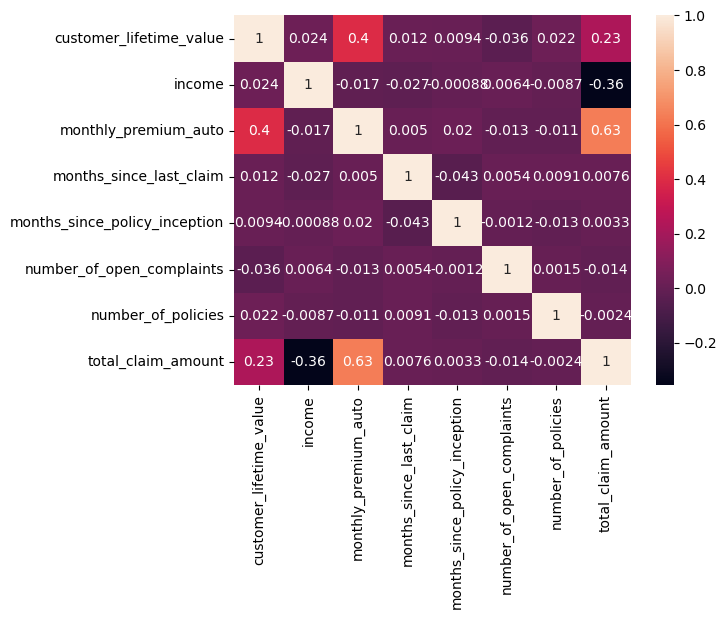

In [ ]:
corr_matrix = num_columns.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

As by the correlations heatmap, we see no need to drop any of the features.

In [ ]:
y = data['total_claim_amount']
X_num = num_columns.drop(['total_claim_amount'], axis=1)

We checked the outliers of the rest of the numerical variables, but we need to check 'customer_lifetime_value' (as we didn't check it yesterday).

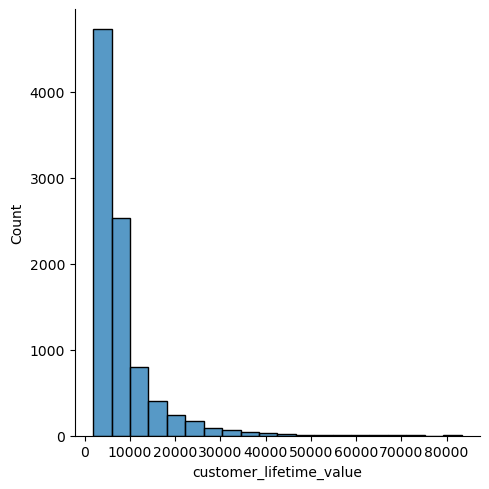

In [ ]:
sns.displot(X_num['customer_lifetime_value'], bins=20)

In [ ]:
data[data['customer_lifetime_value']>60000].select_dtypes(include=[np.number])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1974,74228.51604,0,242,1,34,0,2,1742.400000
3760,61850.18803,0,238,19,29,0,2,1142.400000
4126,60556.19213,0,204,35,45,0,2,979.200000
5279,66025.75407,33481,188,28,46,0,2,1194.892002
5716,83325.38119,58958,231,31,74,0,2,1108.800000
6252,73225.95652,39547,202,11,21,0,2,969.600000
7283,67907.27050,78310,192,34,18,1,2,151.711475
7303,64618.75715,0,217,14,40,1,2,1562.400000
8825,61134.68307,0,198,2,75,0,2,2275.265075


In [ ]:
data[data['customer_lifetime_value']>60000].select_dtypes(include='object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
1974,YC54142,Washington,No,Extended,High School or Below,1/26/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L1,Offer1,Branch,Luxury Car,Medsize
3760,AZ84403,Oregon,No,Extended,College,2/4/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Branch,Luxury SUV,Medsize
4126,JT47995,Arizona,No,Extended,College,1/1/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,Luxury SUV,Large
5279,SK66747,Washington,No,Basic,Bachelor,2/22/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Luxury SUV,Medsize
5716,FQ61281,Oregon,No,Extended,High School or Below,1/31/11,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Call Center,Luxury Car,Small
6252,BP23267,California,No,Extended,Bachelor,2/9/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Branch,Luxury SUV,Medsize
7283,KH55886,Oregon,No,Premium,Bachelor,2/5/11,Employed,M,Rural,Married,Personal Auto,Personal L1,Offer1,Agent,Sports Car,Medsize
7303,FB95288,California,No,Extended,High School or Below,1/17/11,Unemployed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Branch,Luxury Car,Small
8825,US30122,California,No,Basic,College,2/28/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Luxury Car,Medsize


These customers own luxury cars, with a high monthly premium (with respect to the mean) and most of them have an extended or premium coverage. So, the data doesn't seem to be inconsistent at first glance.

We keep them as part of the feature at least for the first iteration of the model.

##### Scaling with MinMax.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_num)

In [ ]:
x_num_normalized = transformer.transform(X_num)
X_num_norm = pd.DataFrame(x_num_normalized, columns=X_num.columns)

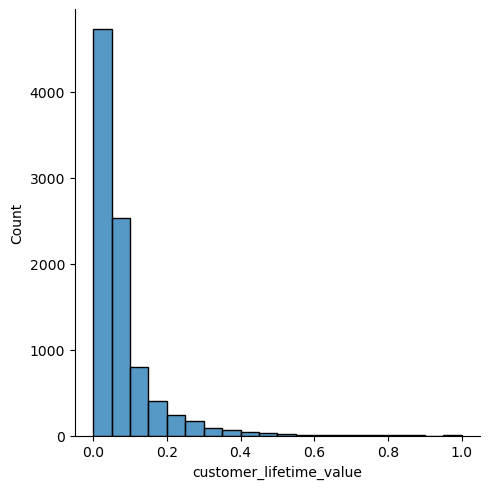

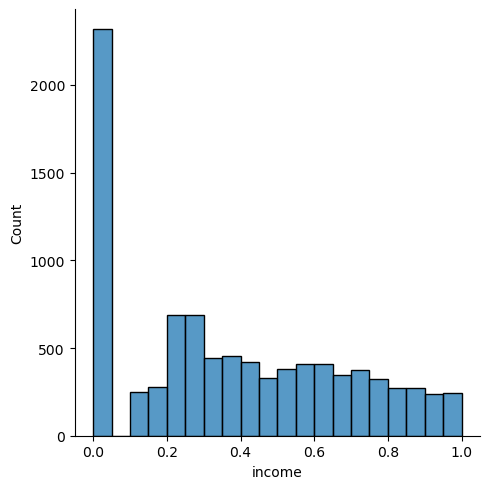

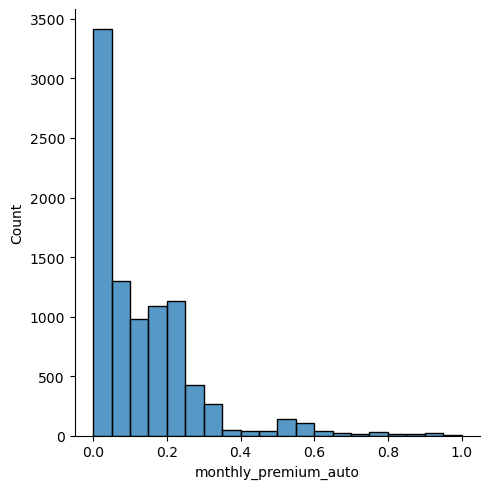

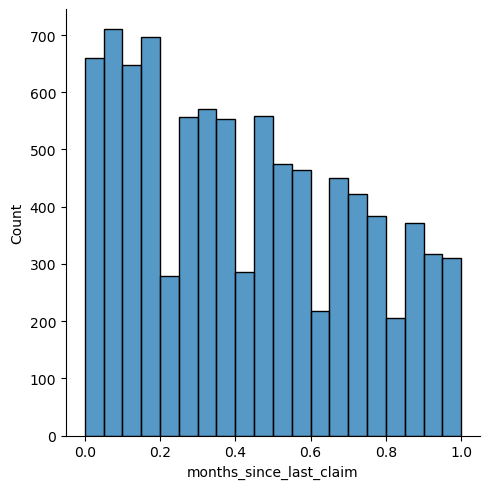

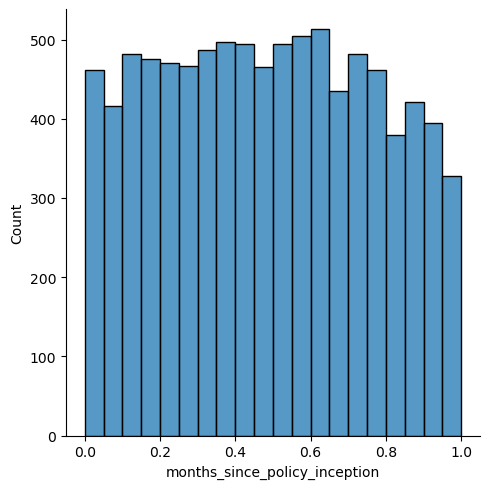

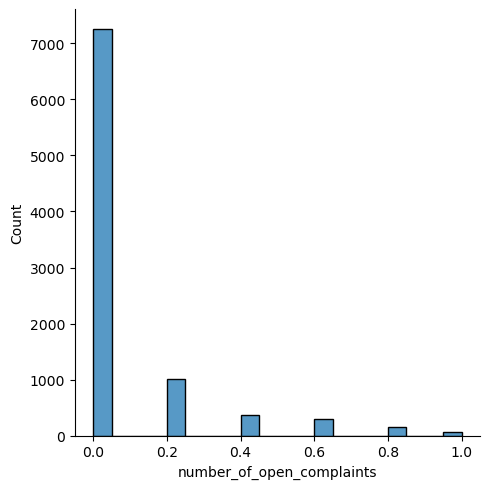

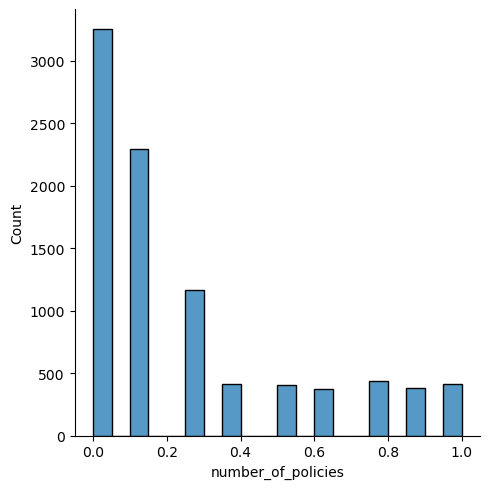

In [ ]:
for column in X_num_norm.columns:
    sns.displot(X_num_norm[column], bins=20)
plt.show()

We've checked the plots and now the data is normalized.

In [ ]:
cat_columns.value_counts()

customer  state       response  coverage  education             effective_to_date  employmentstatus  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
AA10041   California  No        Basic     High School or Below  2/2/11             Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Offer1            Call Center    SUV            Medsize         1
RL28880   Nevada      No        Basic     Bachelor              2/12/11            Employed          F       Suburban       Divorced        Personal Auto   Personal L3   Offer1            Branch         Two-Door Car   Medsize         1
RK63095   California  No        Extended  College               1/1/11             Employed          M       Suburban       Single          Personal Auto   Personal L3   Offer2            Web            Two-Door Car   Medsize         1
RK76184   Arizona     No        Basic     College            

In [ ]:
cat_columns

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


We drop customer column, as it contains the ids of the dataset.

In [ ]:
X_cat = cat_columns.drop(['customer'], axis=1)

We do the same with effective_to_date column, as it contains a handful of different values and doesn't seem to add that much information.

In [ ]:
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [ ]:
X_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


##### Encoding categorical columns with one hot encoder.

Now we encode the rest of the categorical columns with one hot encoder method.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def apply_one_hot_encoding(data, column_name):
    encoder = OneHotEncoder(drop='first').fit(data)
    encoded = encoder.transform(data).toarray()
    column_names = encoder.get_feature_names_out([column_name])
    onehot_encoded = pd.DataFrame(encoded, columns=column_names)
    return onehot_encoded

X_cat_encoded = []
for column_name in X_cat.columns:
    encoded_data = apply_one_hot_encoding(X_cat[[column_name]], column_name)
    X_cat_encoded.append(encoded_data)

In [ ]:
X = pd.concat([X_num_norm] + X_cat_encoded, axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Linear regression model (1).

Train-test split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 50)
(1827, 50)
(7307,)
(1827,)


In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

We make predictions with X_test.

In [ ]:
y_pred = lm.predict(X_test)

##### Metrics (betwween y_test and the predictions made with X_test).

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7743807425738766

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

19229.186107084075

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

138.66934090520542

In [ ]:
y_test.mean()

443.30820863054186

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

95.75285953041946
